In [151]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import torch

sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 300

results_path = Path("/Users/Matey/project/fact8/benchmarks/results/")
mcts_path = Path("/Users/Matey/project/fact8/tgnnexplainer/xgraph/saved_mcts_results/")

os.makedirs("plots", exist_ok=True)

explainers = [
    "xtg",
    "attn",
    "pbone",
    "pg",
    "xtg-d",
]
labels = {
    'xtg': 'TGNN-X',
    'attn': 'ATTN',
    'pbone': 'PBONE',
    'pg': 'PG',
    'xtg-d': 'TGNN-X (DOT)',
    'xtg-non': 'TGNN-X (NO NAV)',
}
dataset_to_index = {
    "simulate_v1": "Synthetic V1",
    "simulate_v2": "Synthetic V2",
    "wikipedia": "Wikipedia",
    "reddit": "Reddit",
}

In [27]:
## Their data
df_tgat_theirs = {
    ("Wikipedia", "Best FID"): {
        "ATTN": 0.891,
        "PBONE": 0.027,
        "PG": 1.354,
        "TGNN-X": 1.836,
    },
    ("Wikipedia", "AUFSC"): {
        "ATTN": 0.564,
        "PBONE": -2.227,
        "PG": 0.564,
        "TGNN-X": 1.477,
    },
    ("Reddit", "Best FID"): {
        "ATTN": 0.658,
        "PBONE": 0.167,
        "PG": 0.804,
        "TGNN-X": 1.518,
    },
    ("Reddit", "AUFSC"): {
        "ATTN": -0.654,
        "PBONE": -2.492,
        "PG": -0.369,
        "TGNN-X": 1.076,
    },
    ("Simulate V1", "Best FID"): {
        "ATTN": 0.555,
        "PBONE": 0.044,
        "PG": 0.555,
        "TGNN-X": 0.78,
    },
    ("Simulate V1", "AUFSC"): {
        "ATTN": -0.081,
        "PBONE": -2.882,
        "PG": 0.39,
        "TGNN-X": 0.666,
    },
    ("Simulate V2", "Best FID"): {
        "ATTN": 0.605,
        "PBONE": 0.096,
        "PG": 1.329,
        "TGNN-X": 1.63,
    },
    ("Simulate V2", "AUFSC"): {
        "ATTN": 0.291,
        "PBONE": -4.771,
        "PG": -0.926,
        "TGNN-X": 1.331,
    },
}

df_tgn_theirs = {
    ("Wikipedia", "Best FID"): {
        "ATTN": 0.479,
        "PBONE": 0.296,
        "PG": 0.464,
        "TGNN-X": 0.866,
    },
    ("Wikipedia", "AUFSC"): {
        "ATTN": 0.231,
        "PBONE": -0.601,
        "PG": -0.231,
        "TGNN-X": 0.59,
    },
    ("Reddit", "Best FID"): {
        "ATTN": 0.575,
        "PBONE": 0.34,
        "PG": 0.679,
        "TGNN-X": 1.362,
    },
    ("Reddit", "AUFSC"): {"ATTN": 0.289, "PBONE": -0.256, "PG": 0.02, "TGNN-X": 1.113},
    ("Simulate V1", "Best FID"): {
        "ATTN": 2.178,
        "PBONE": 0.001,
        "PG": 2.006,
        "TGNN-X": 2.708,
    },
    ("Simulate V1", "AUFSC"): {
        "ATTN": 1.624,
        "PBONE": -3.311,
        "PG": 0.626,
        "TGNN-X": 2.281,
    },
    ("Simulate V2", "Best FID"): {
        "ATTN": 0.988,
        "PBONE": 0.32,
        "PG": 1.012,
        "TGNN-X": 4.356,
    },
    ("Simulate V2", "AUFSC"): {
        "ATTN": -1.338,
        "PBONE": -5.413,
        "PG": -1.338,
        "TGNN-X": 3.224,
    },
}

df_tgat_theirs = pd.DataFrame.from_dict(df_tgat_theirs, orient="columns")
df_tgn_theirs = pd.DataFrame.from_dict(df_tgn_theirs, orient="columns")
# df_tgat_theirs

## TGAT
### Wikipedia

Best Fid: {'xtg': 1.4116824127268046, 'attn': 0.8115232161860914, 'pbone': 1.2597488984894007, 'pg': 0.6847479770611972, 'xtg-d': 1.2794689267873764}
AUFSC: {'xtg': 0.913682348204963, 'attn': 0.5135449832312763, 'pbone': 0.8691429948334582, 'pg': -0.37464903415529993, 'xtg-d': 0.5082737971709574}
xtg	 FID: 0.7718711843846278 	 AUC: 0.913682348204963
attn	 FID: 0.4633937401310318 	 AUC: 0.5135449832312763
pbone	 FID: 0.8280495267829725 	 AUC: 0.8691429948334582
pg	 FID: -0.43719394557967417 	 AUC: -0.37464903415529993
xtg-d	 FID: 0.3906054824120587 	 AUC: 0.5082737971709574


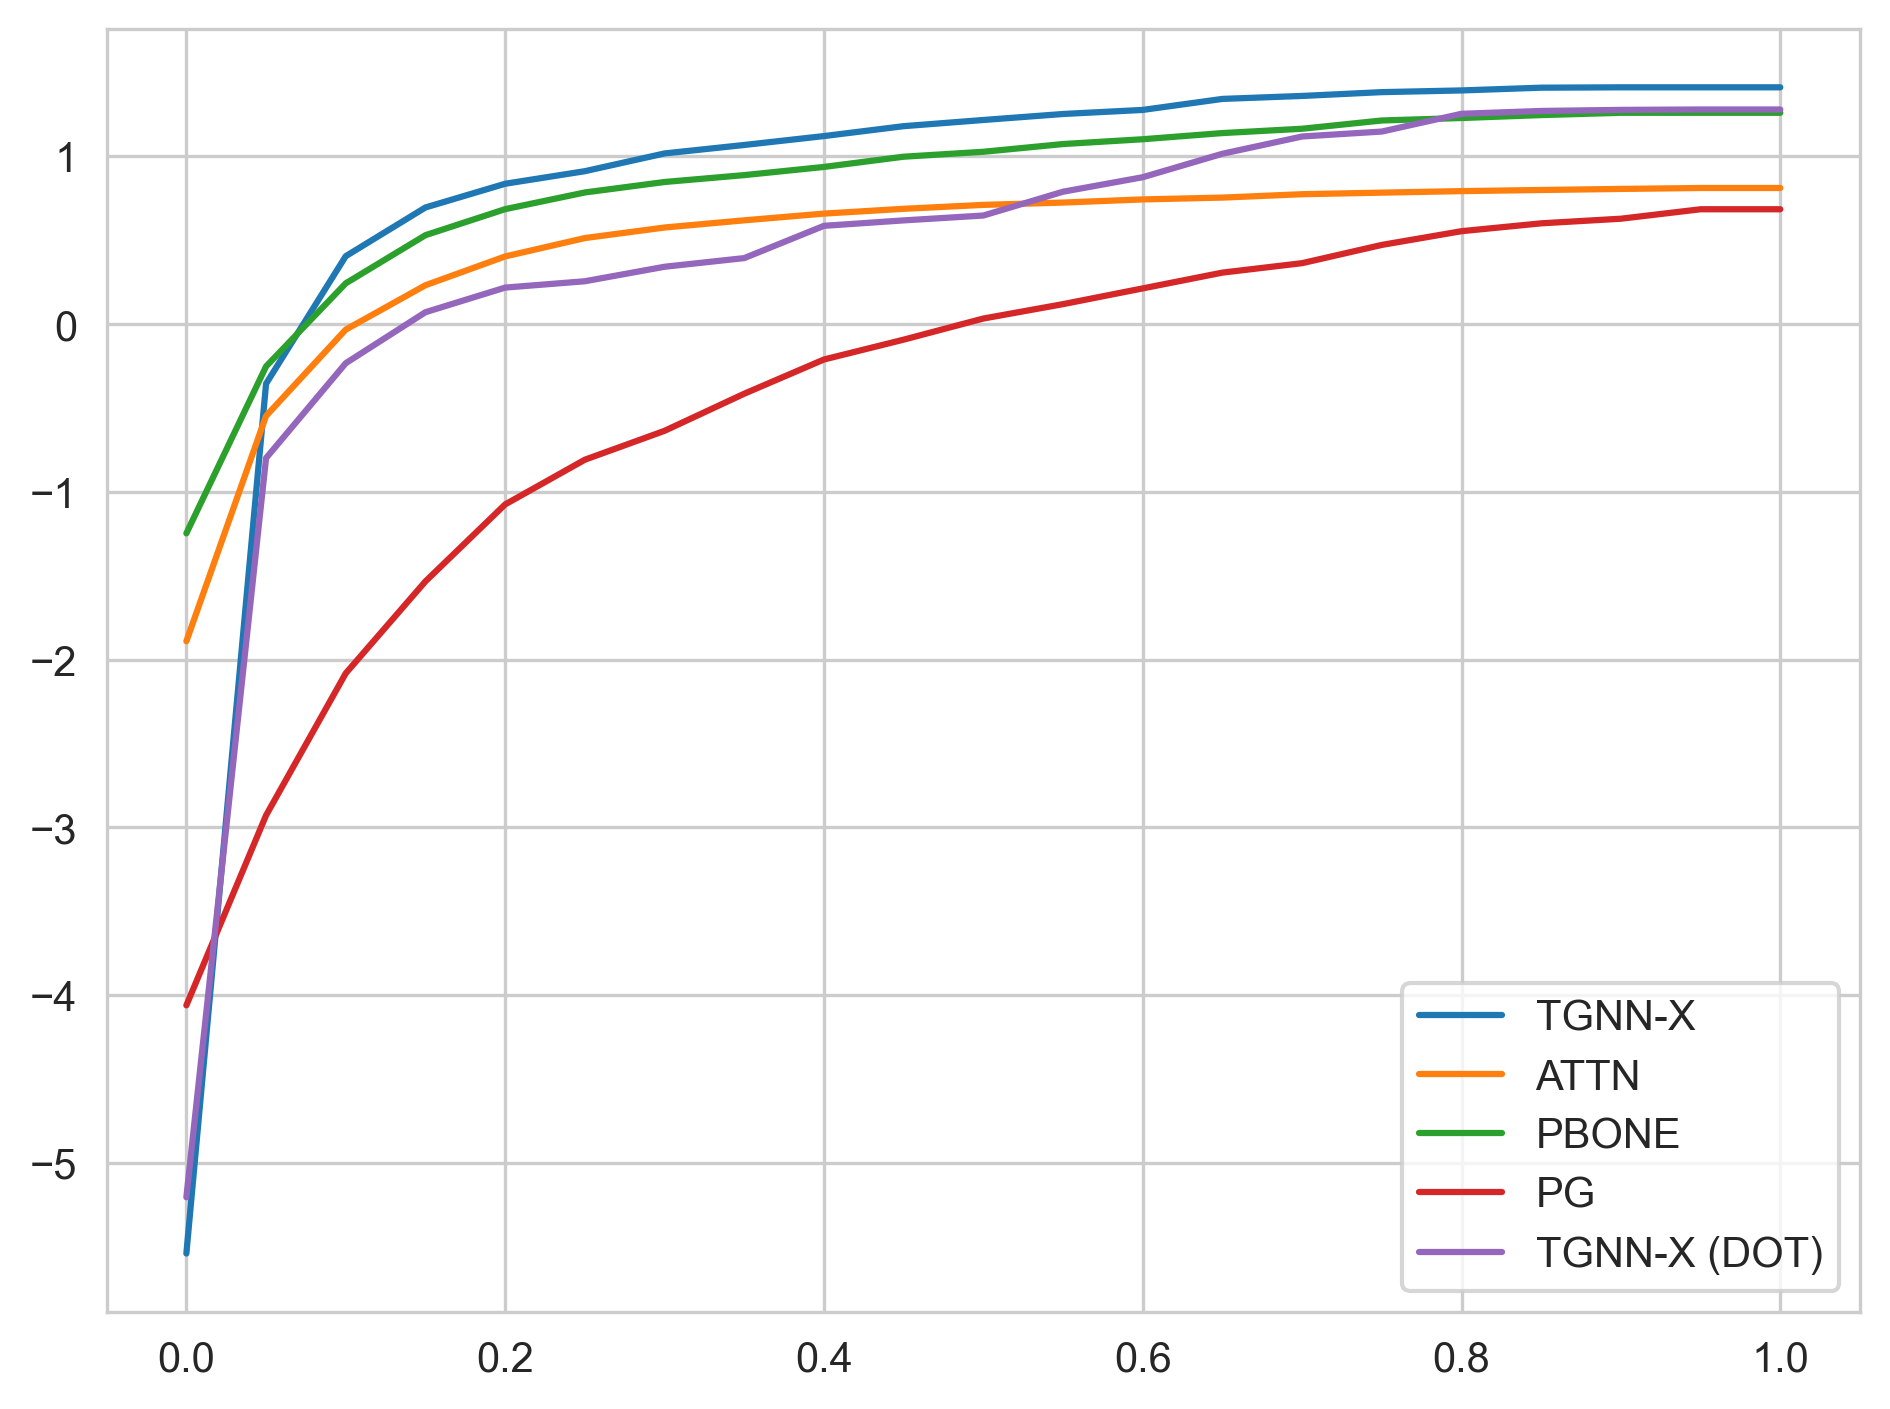

In [75]:
tgat_wikipedia_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive.csv",
            "tgat_wikipedia_attn_explainer_tg_110314_to_155614_eval.csv",
            "tgat_wikipedia_pbone_explainer_tg_110314_to_155614_eval.csv",
            "tgat_wikipedia_pg_explainer_tg_110314_to_155614_eval.csv",
            "tgat_wikipedia_subgraphx_tg_110314_to_155151_eval_dot_true_pg_positive.csv",
        ],
    )
}

tgat_wikipedia_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgat_wikipedia_files.items()
}

tgat_wikipedia_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgat_wikipedia_tabs.items()
}
tgat_wikipedia_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgat_wikipedia_tabs.items()
}

print("Best Fid:", tgat_wikipedia_best_fids)
print("AUFSC:", tgat_wikipedia_aufsc)

for k, tab in tgat_wikipedia_tabs.items():
    print(
        f"{k}\t FID: {tab['fid_inv_best'].mean()} \t AUC: {np.trapz(tab['fid_inv_best'], tab.index)}"
    )
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k])
plt.legend()
plt.tight_layout()
plt.savefig("plots/tgat_wikipedia.png")

## Reddit

Best Fid: {'xtg': 1.188740246668458, 'attn': 0.46591258417069914, 'pbone': 1.2121049303114415, 'pg': 0.5481336815953255, 'xtg-d': 1.2849917187541724}
AUFSC: {'xtg': 0.4211314124386758, 'attn': -0.9362572968028485, 'pbone': 0.8172783054485916, 'pg': -0.8289851863332094, 'xtg-d': 0.5329389365892856}
xtg	 FID: 1.188740246668458 	 AUC: 0.4211314124386758
attn	 FID: 0.46591258417069914 	 AUC: -0.9362572968028485
pbone	 FID: 1.2121049303114415 	 AUC: 0.8172783054485916
pg	 FID: 0.5481336815953255 	 AUC: -0.8289851863332094
xtg-d	 FID: 1.2849917187541724 	 AUC: 0.5329389365892856


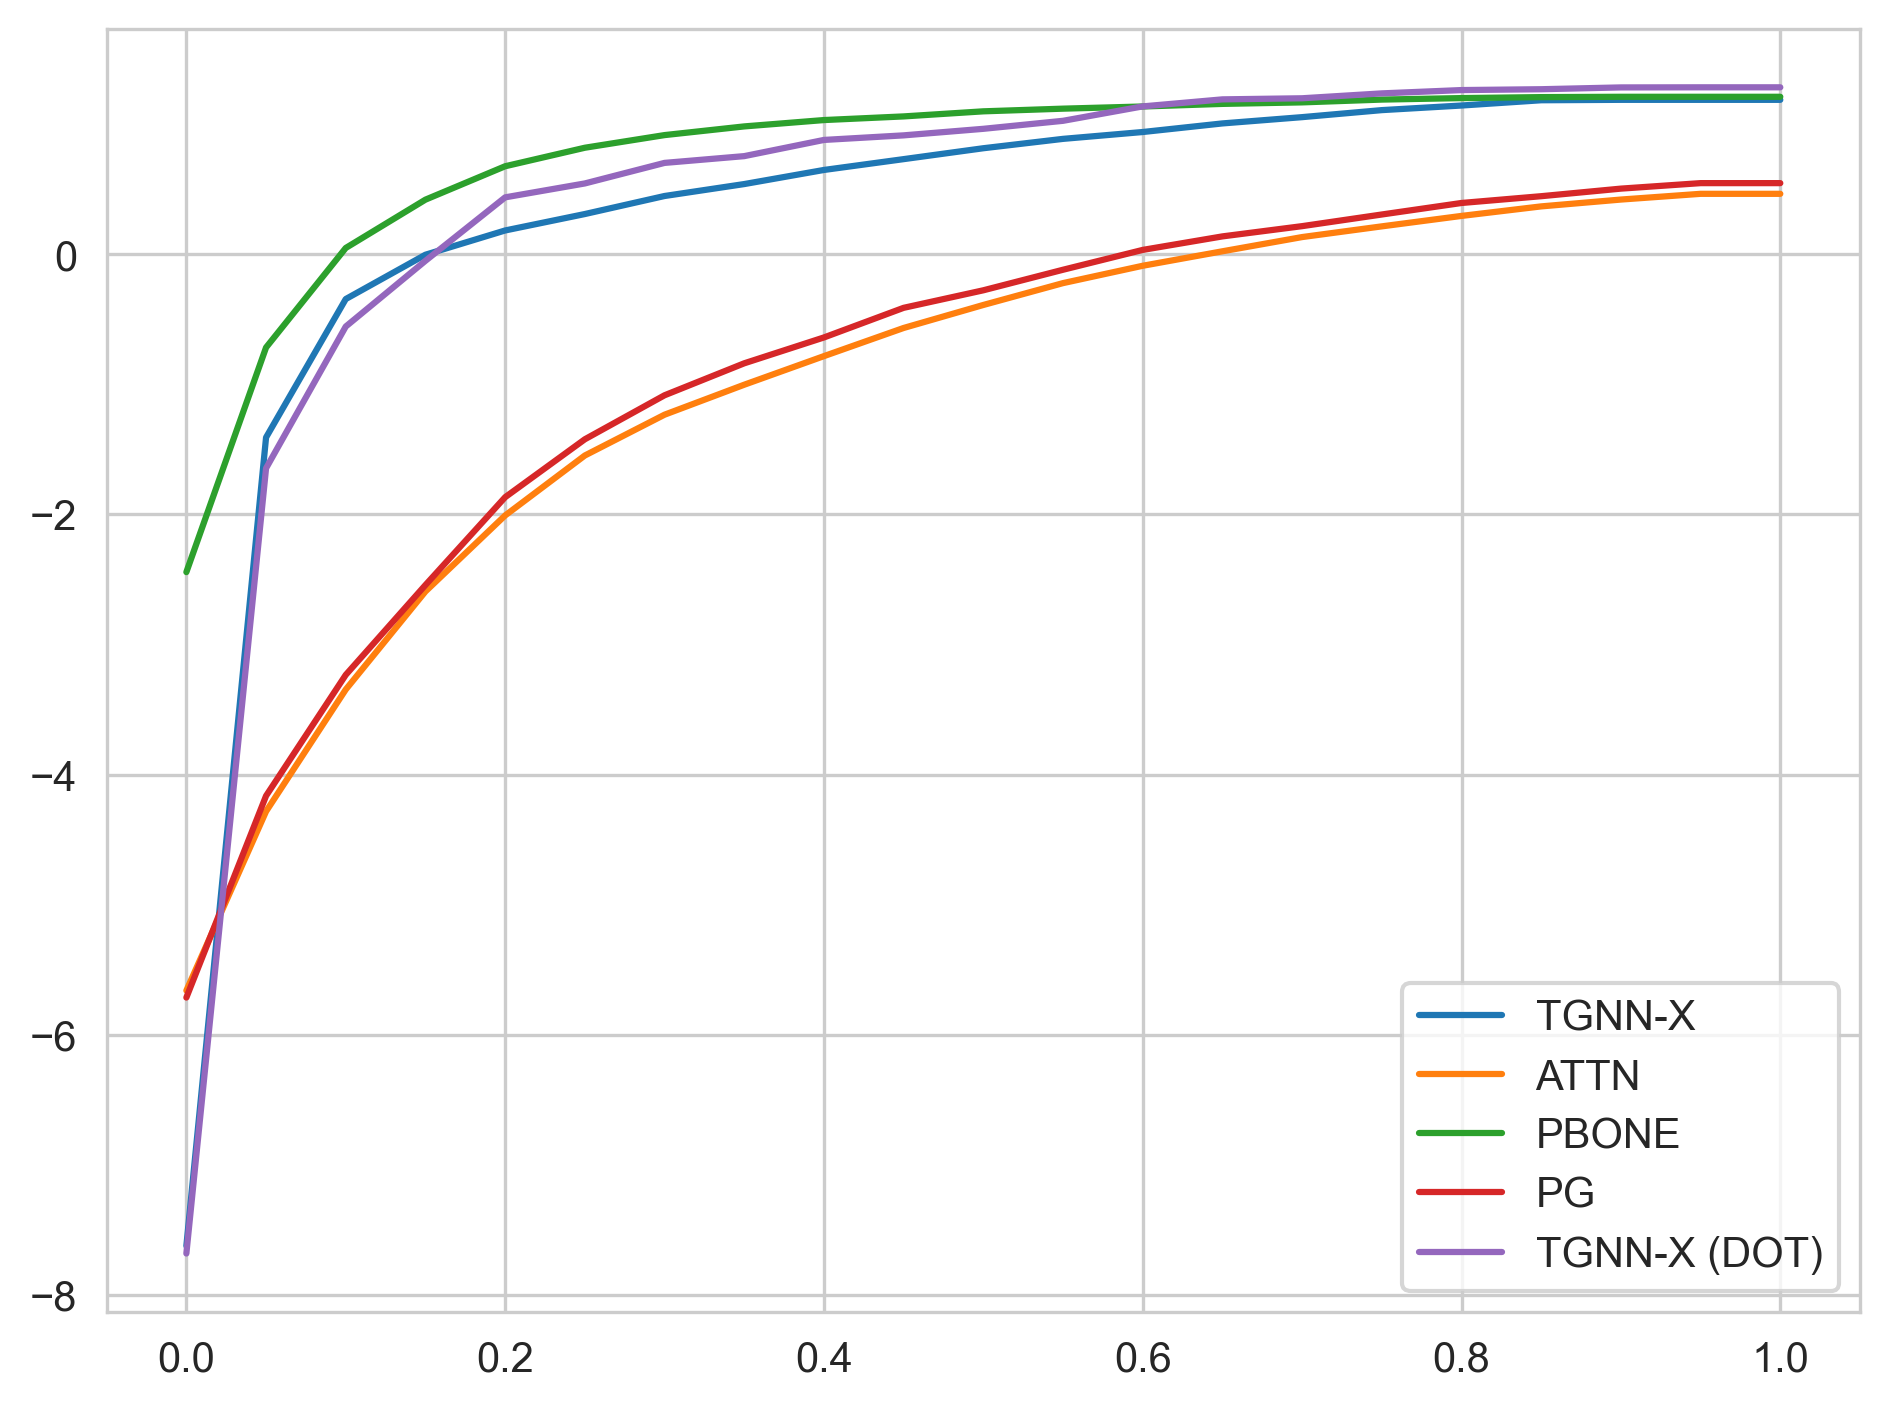

In [76]:
tgat_reddit_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_reddit_subgraphx_tg_470920_to_665351_eval_pg_true_pg_positive.csv",
            "tgat_reddit_attn_explainer_tg_470920_to_665351_eval.csv",
            "tgat_reddit_pbone_explainer_tg_470920_to_665351_eval.csv",
            "tgat_reddit_pg_explainer_tg_470920_to_665351_eval.csv",
            "tgat_reddit_subgraphx_tg_470920_to_663534_eval_dot_true_pg_positive.csv"
        ],
    )
}

tgat_reddit_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean() for k, v in tgat_reddit_files.items()
}

tgat_reddit_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgat_reddit_tabs.items()
}

tgat_reddit_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgat_reddit_tabs.items()
}

print("Best Fid:", tgat_reddit_best_fids)
print("AUFSC:", tgat_reddit_aufsc)

for k, tab in tgat_reddit_tabs.items():
    print(
        f"{k}\t FID: {tab['fid_inv_best'].max()} \t AUC: {np.trapz(tab['fid_inv_best'], tab.index)}"
    )
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k])
plt.legend();plt.tight_layout()
plt.savefig("plots/tgat_reddit.png")

## Simulate V1

Best Fid: {'xtg': 1.2514102354049683, 'attn': 0.621812455534935, 'pbone': 1.0244546887874604, 'pg': 0.6777639939188957, 'xtg-d': 0.9000731908223208}
AUFSC: {'xtg': 0.8547494157694278, 'attn': 0.17859825834110377, 'pbone': 0.6275241337478161, 'pg': -0.3059464243195951, 'xtg-d': 0.2514480130637393}
xtg	 FID: 1.2514102354049683 	 AUC: 0.8547494157694278
attn	 FID: 0.621812455534935 	 AUC: 0.17859825834110377
pbone	 FID: 1.0244546887874604 	 AUC: 0.6275241337478161
pg	 FID: 0.6777639939188957 	 AUC: -0.3059464243195951
xtg-d	 FID: 0.9000731908223208 	 AUC: 0.2514480130637393


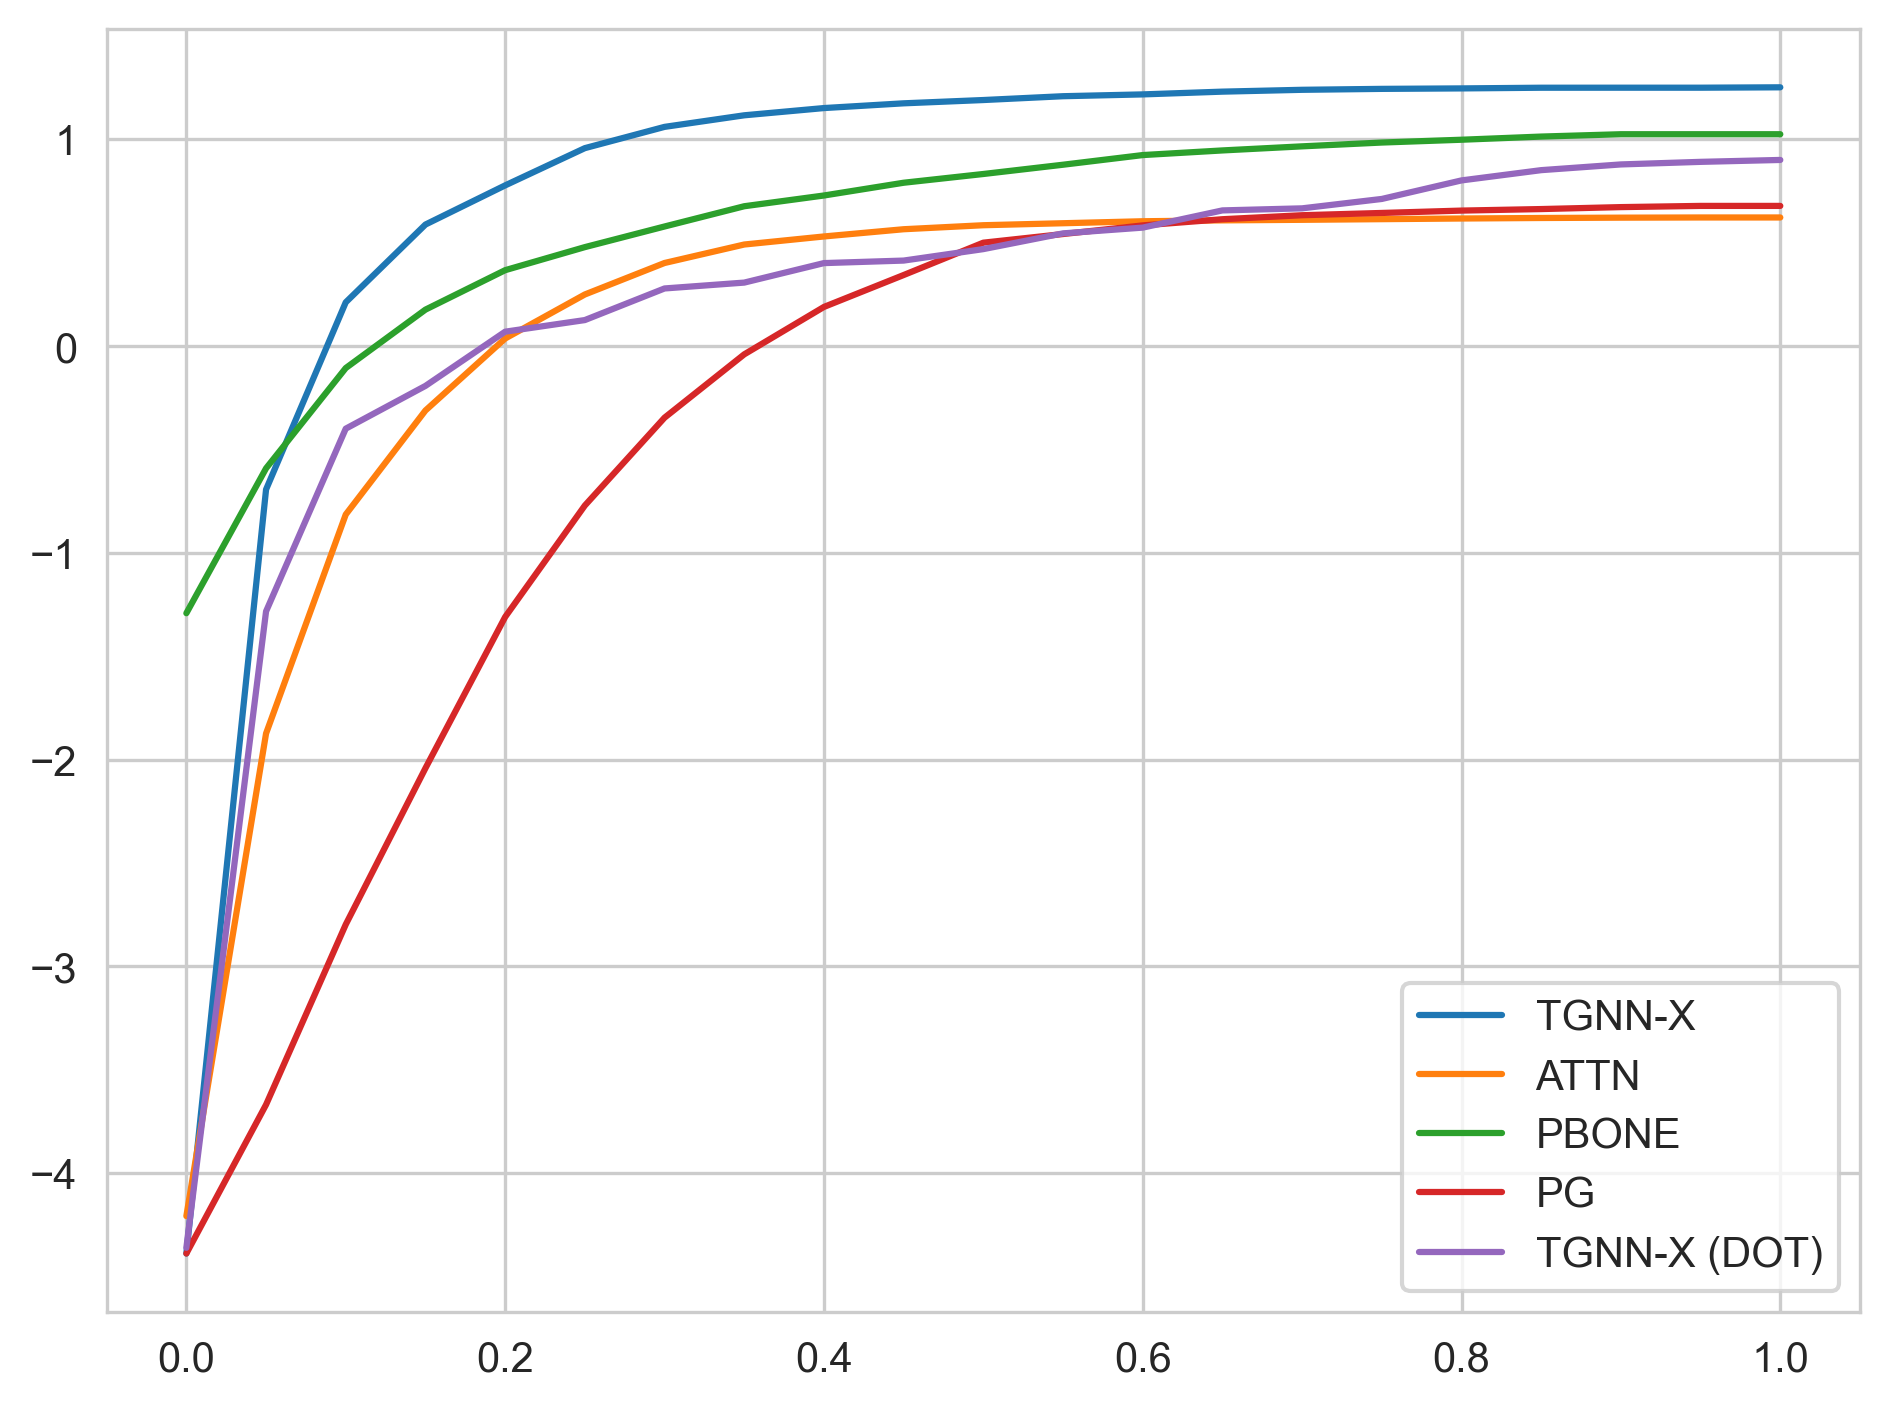

In [77]:
tgat_simulate_v1_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_simulate_v1_subgraphx_tg_3_to_15902_eval_pg_true_pg_positive.csv",
            "tgat_simulate_v1_attn_explainer_tg_3_to_15902_eval.csv",
            "tgat_simulate_v1_pbone_explainer_tg_3_to_15902_eval.csv",
            "tgat_simulate_v1_pg_explainer_tg_3_to_15902_eval.csv",
            "tgat_simulate_v1_subgraphx_tg_3_to_15902_eval_dot_true_pg_positive.csv"
        ],
    )
}

tgat_simulate_v1_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgat_simulate_v1_files.items()
}

tgat_simulate_v1_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgat_simulate_v1_tabs.items()
}

tgat_simulate_v1_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgat_simulate_v1_tabs.items()
}
print("Best Fid:", tgat_simulate_v1_best_fids)
print("AUFSC:", tgat_simulate_v1_aufsc)

for k, tab in tgat_simulate_v1_tabs.items():
    print(
        f"{k}\t FID: {tab['fid_inv_best'].max()} \t AUC: {np.trapz(tab['fid_inv_best'], tab.index)}"
    )
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k])
plt.legend();plt.tight_layout()
plt.savefig("plots/tgat_simulate_v1.png")

## Simulate V2

Best Fid: {'xtg': 0.8340411904156209, 'attn': 0.05967254871129988, 'pbone': 0.7078214499056339, 'pg': 0.7464178370833396, 'xtg-d': 0.8492246125550831}
AUFSC: {'xtg': 0.6337536801677198, 'attn': -0.08515523201450705, 'pbone': 0.44202910242751237, 'pg': 0.22783191517032678, 'xtg-d': 0.7909700851832681}
xtg	 FID: 0.8340411904156209 	 AUC: 0.6337536801677198
attn	 FID: 0.05967254871129988 	 AUC: -0.08515523201450705
pbone	 FID: 0.7078214499056339 	 AUC: 0.44202910242751237
pg	 FID: 0.7464178370833396 	 AUC: 0.22783191517032678
xtg-d	 FID: 0.8492246125550831 	 AUC: 0.7909700851832681


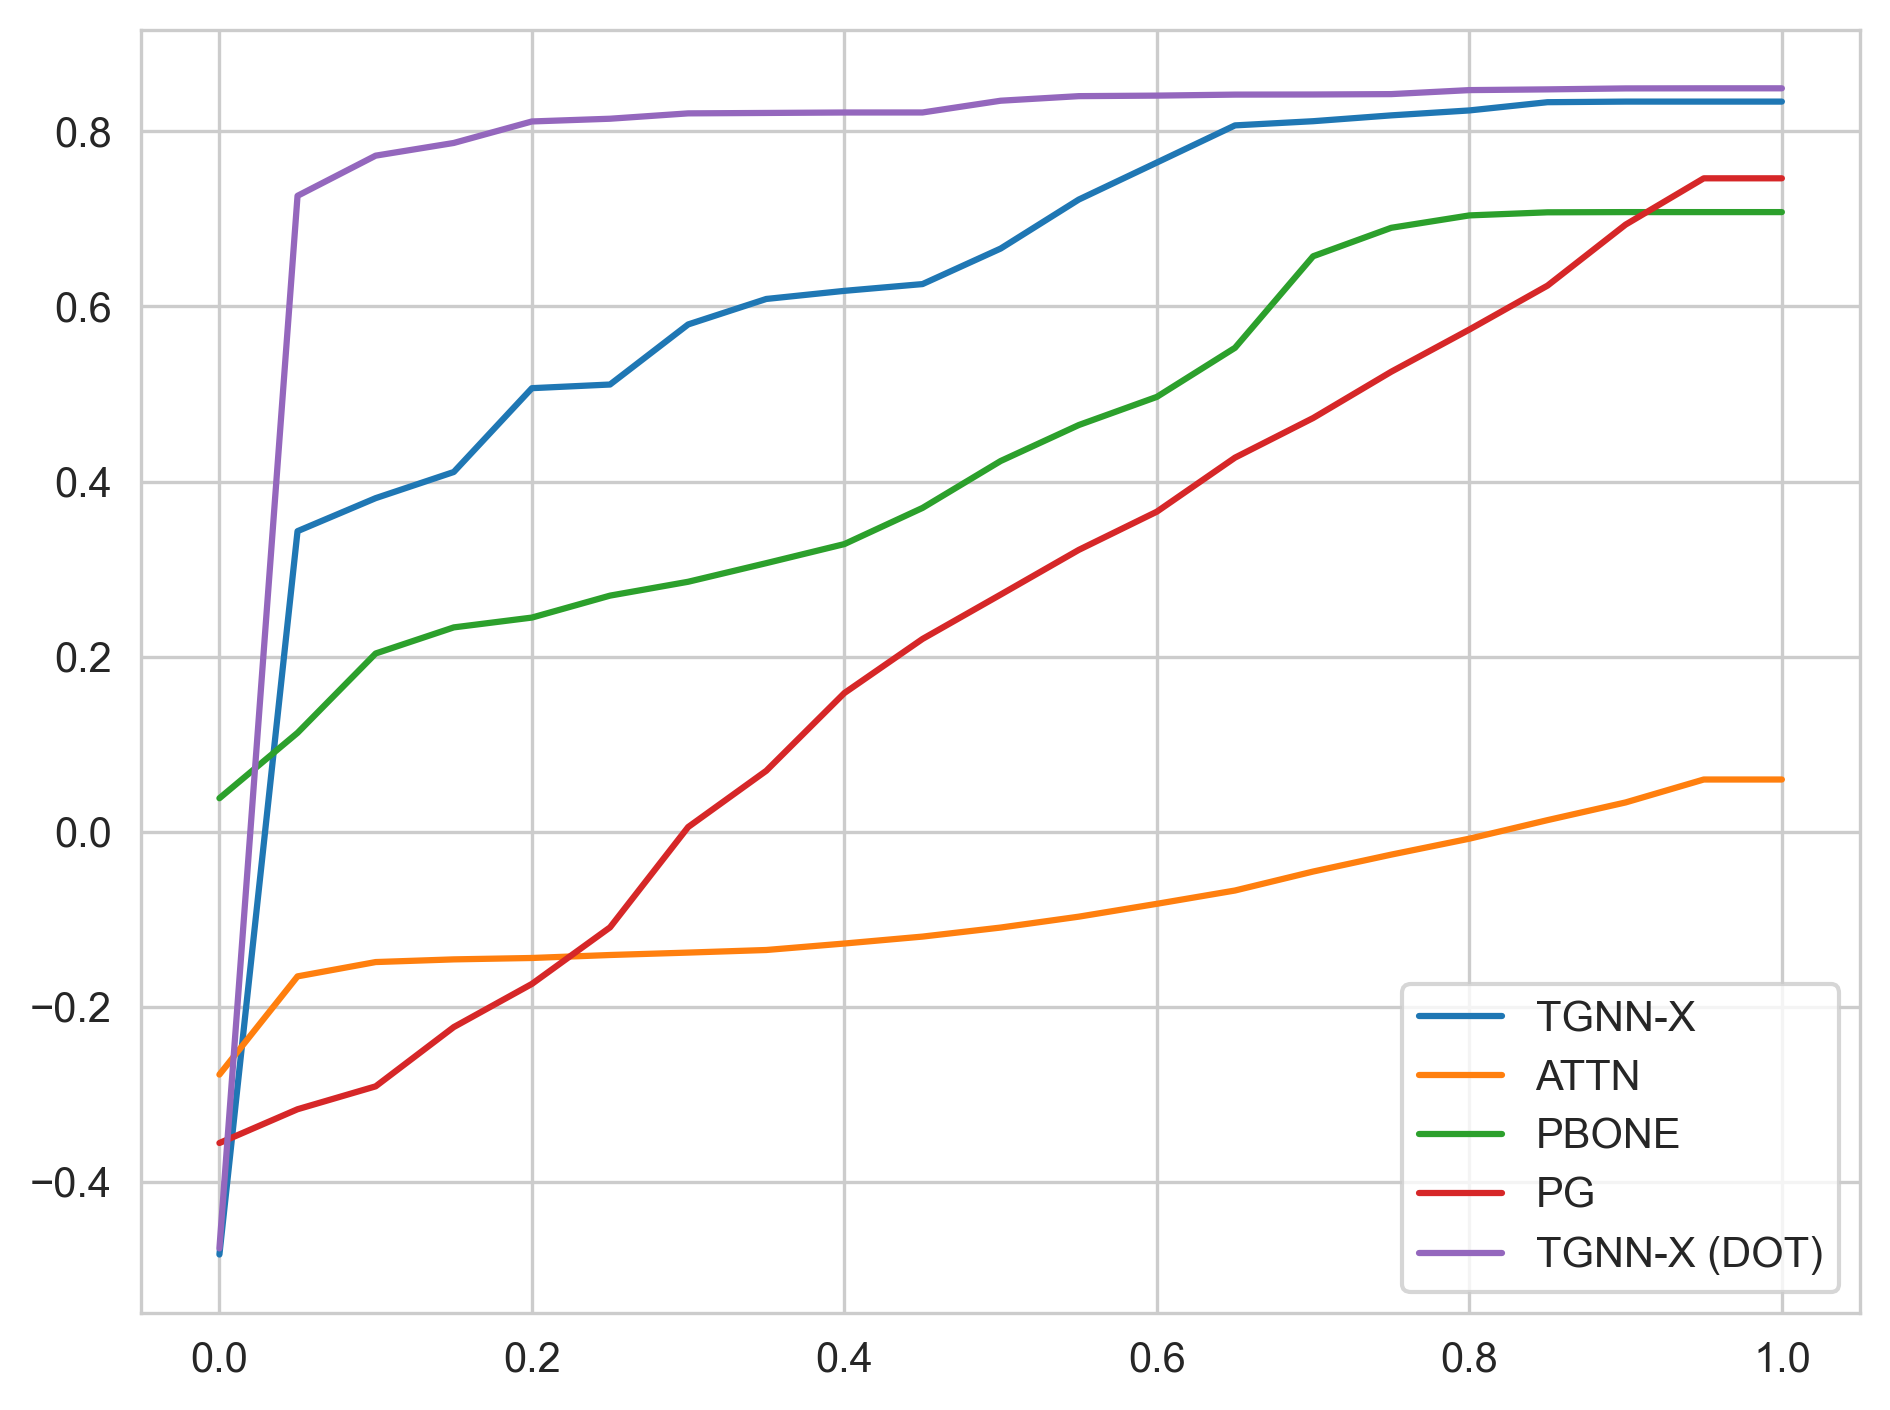

In [78]:
tgat_simulate_v2_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_simulate_v2_subgraphx_tg_3_to_21752_eval_pg_true_pg_positive.csv",
            "tgat_simulate_v2_attn_explainer_tg_3_to_21752_eval.csv",
            "tgat_simulate_v2_pbone_explainer_tg_3_to_21752_eval.csv",
            "tgat_simulate_v2_pg_explainer_tg_3_to_21752_eval.csv",
            "tgat_simulate_v2_subgraphx_tg_3_to_21752_eval_dot_true_pg_positive.csv"
        ],
    )
}
tgat_simulate_v2_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgat_simulate_v2_files.items()
}
tgat_simulate_v2_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgat_simulate_v2_tabs.items()
}
tgat_simulate_v2_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgat_simulate_v2_tabs.items()
}
print("Best Fid:", tgat_simulate_v2_best_fids)
print("AUFSC:", tgat_simulate_v2_aufsc)

for k, tab in tgat_simulate_v2_tabs.items():
    print(
        f"{k}\t FID: {tab['fid_inv_best'].max()} \t AUC: {np.trapz(tab['fid_inv_best'], tab.index)}"
    )
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k])
plt.legend();plt.tight_layout()
plt.savefig("plots/tgat_simulate_v2.png")

# TGN
## Wikipedia

Best Fid: {'xtg': 0.8290388554781676, 'attn': 0.5148783878684043, 'pbone': 0.6475937870591879, 'pg': 0.45970433977246283, 'xtg-d': 0.943455517962575}
AUFSC: {'xtg': 0.4439554229337722, 'attn': 0.3126810891754925, 'pbone': 0.3932880073327572, 'pg': -0.3673622658334673, 'xtg-d': 0.31716032993420956}
xtg	 FID: 0.8290388554781676 	 AUC: 0.4439554229337722
attn	 FID: 0.5148783878684043 	 AUC: 0.3126810891754925
pbone	 FID: 0.6475937870591879 	 AUC: 0.3932880073327572
pg	 FID: 0.45970433977246283 	 AUC: -0.3673622658334673
xtg-d	 FID: 0.943455517962575 	 AUC: 0.31716032993420956


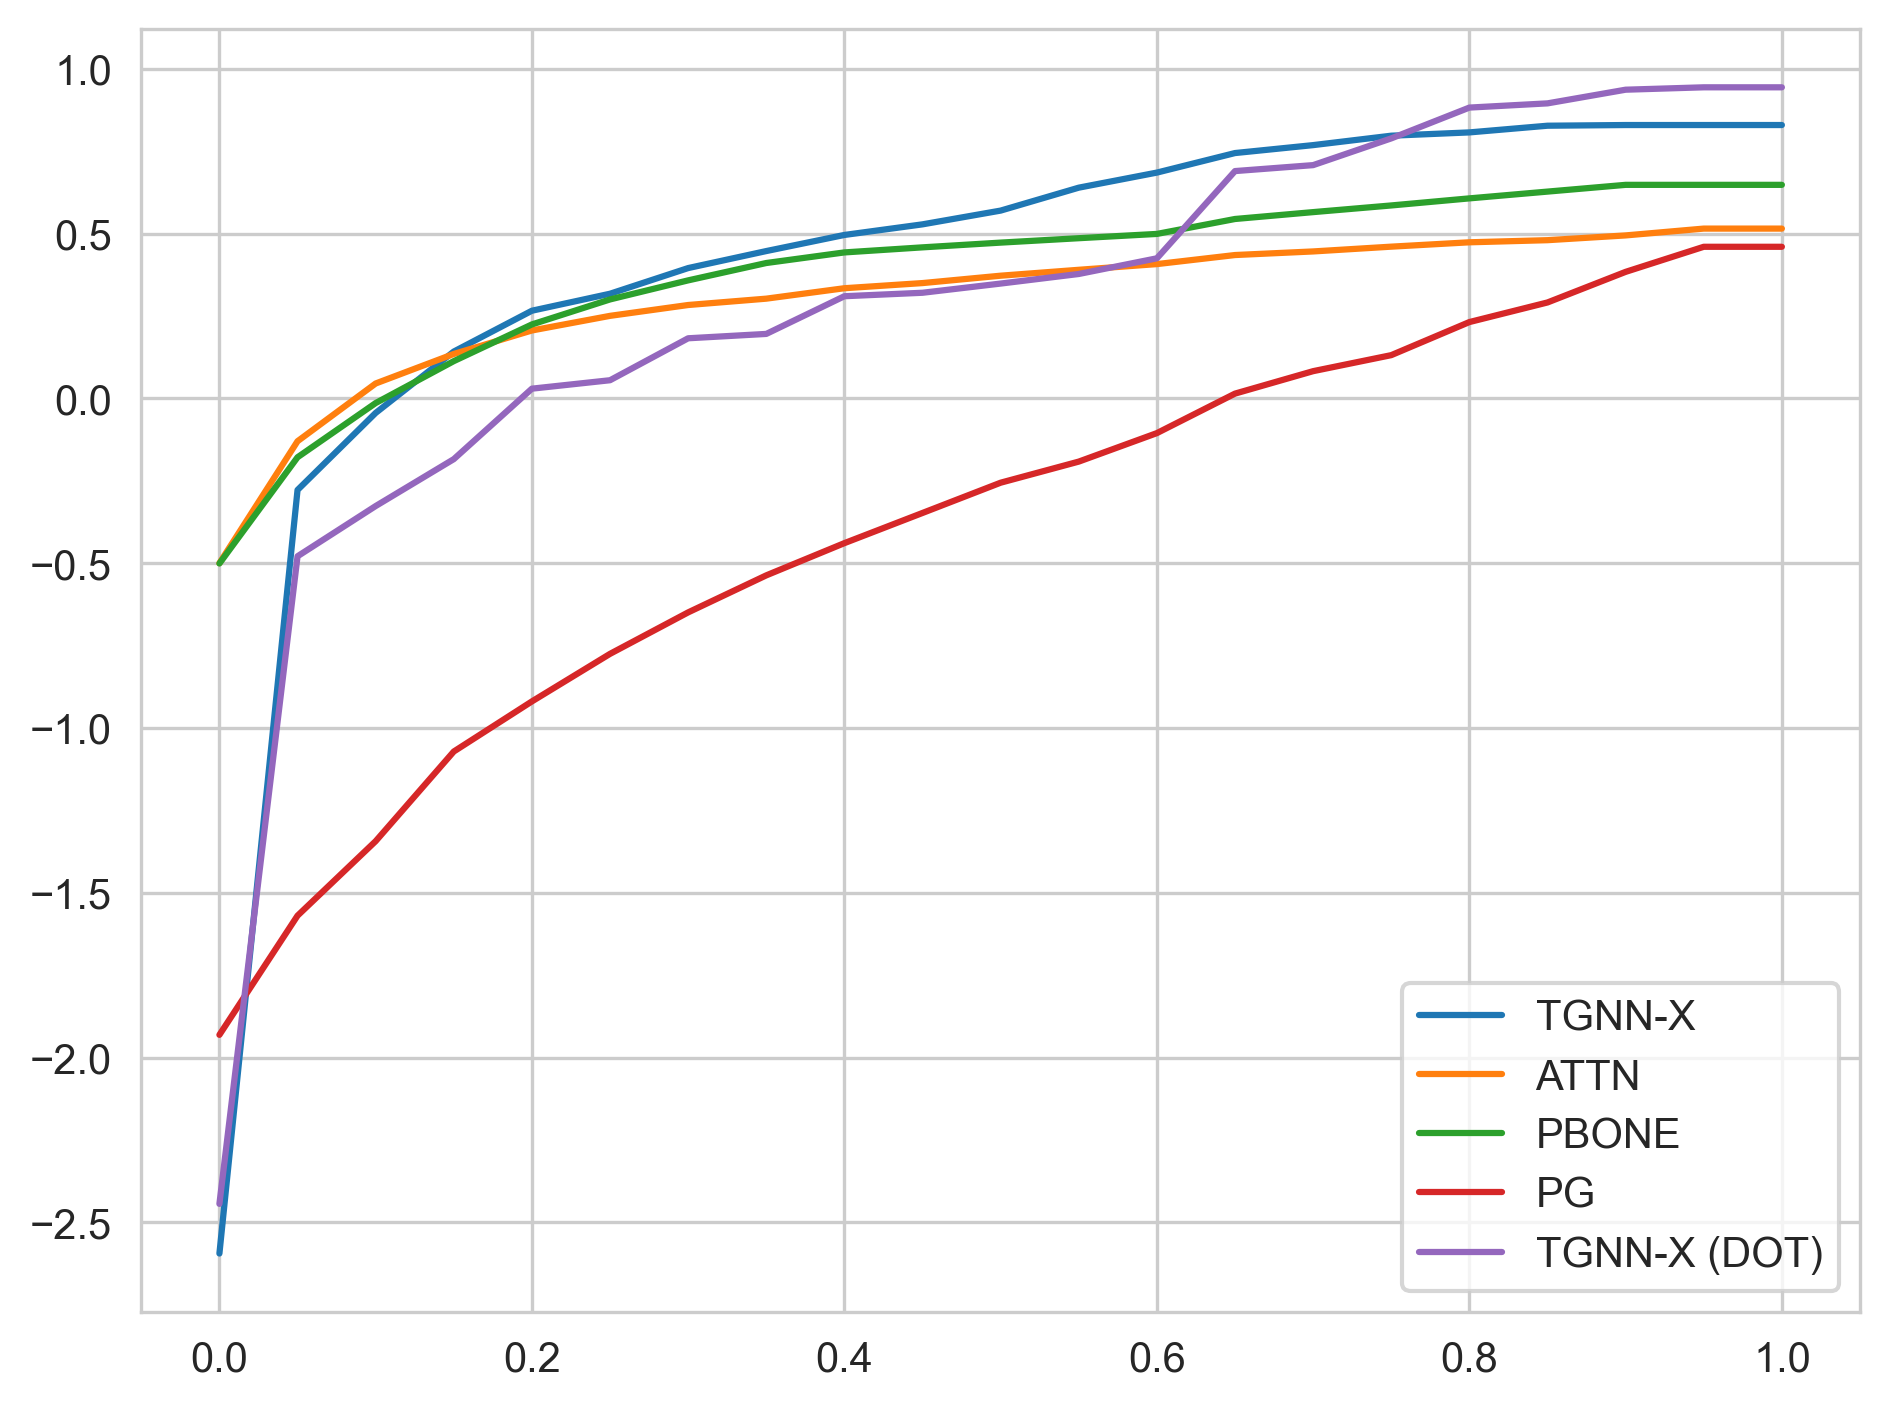

In [79]:
tgn_wikipedia_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_wikipedia_subgraphx_tg_110314_to_155614_eval_pg_true_pg_positive.csv",
            "tgn_wikipedia_attn_explainer_tg_110314_to_155614_eval.csv",
            "tgn_wikipedia_pbone_explainer_tg_110314_to_155614_eval.csv",
            "tgn_wikipedia_pg_explainer_tg_110314_to_155614_eval.csv",
            "tgn_wikipedia_subgraphx_tg_110314_to_155151_eval_dot_true_pg_positive.csv"
        ],
    )
}

tgn_wikipedia_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgn_wikipedia_files.items()
}

tgn_wikipedia_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgn_wikipedia_tabs.items()
}
tgn_wikipedia_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index) for k, tab in tgn_wikipedia_tabs.items()
}
print("Best Fid:", tgn_wikipedia_best_fids)
print("AUFSC:", tgn_wikipedia_aufsc)

for k, tab in tgn_wikipedia_tabs.items():
    print(
        f"{k}\t FID: {tab['fid_inv_best'].max()} \t AUC: {np.trapz(tab['fid_inv_best'], tab.index)}"
    )
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k])
plt.legend();plt.tight_layout()
plt.savefig("plots/tgn_wikipedia.png")

## Reddit

Best Fid: {'xtg': 0.2385956601500511, 'attn': 0.14476382285356518, 'pbone': 0.24414053630828855, 'pg': 0.11693396629393099, 'xtg-d': 0.2913777559995651}
AUFSC: {'xtg': -1.492410185137764, 'attn': -1.5458064605053519, 'pbone': -0.6292809361521156, 'pg': -2.209208604266495, 'xtg-d': -1.3910643502660096}
xtg	 FID: 0.2385956601500511 	 AUC: -1.492410185137764
attn	 FID: 0.14476382285356518 	 AUC: -1.5458064605053519
pbone	 FID: 0.24414053630828855 	 AUC: -0.6292809361521156
pg	 FID: 0.11693396629393099 	 AUC: -2.209208604266495
xtg-d	 FID: 0.2913777559995651 	 AUC: -1.3910643502660096


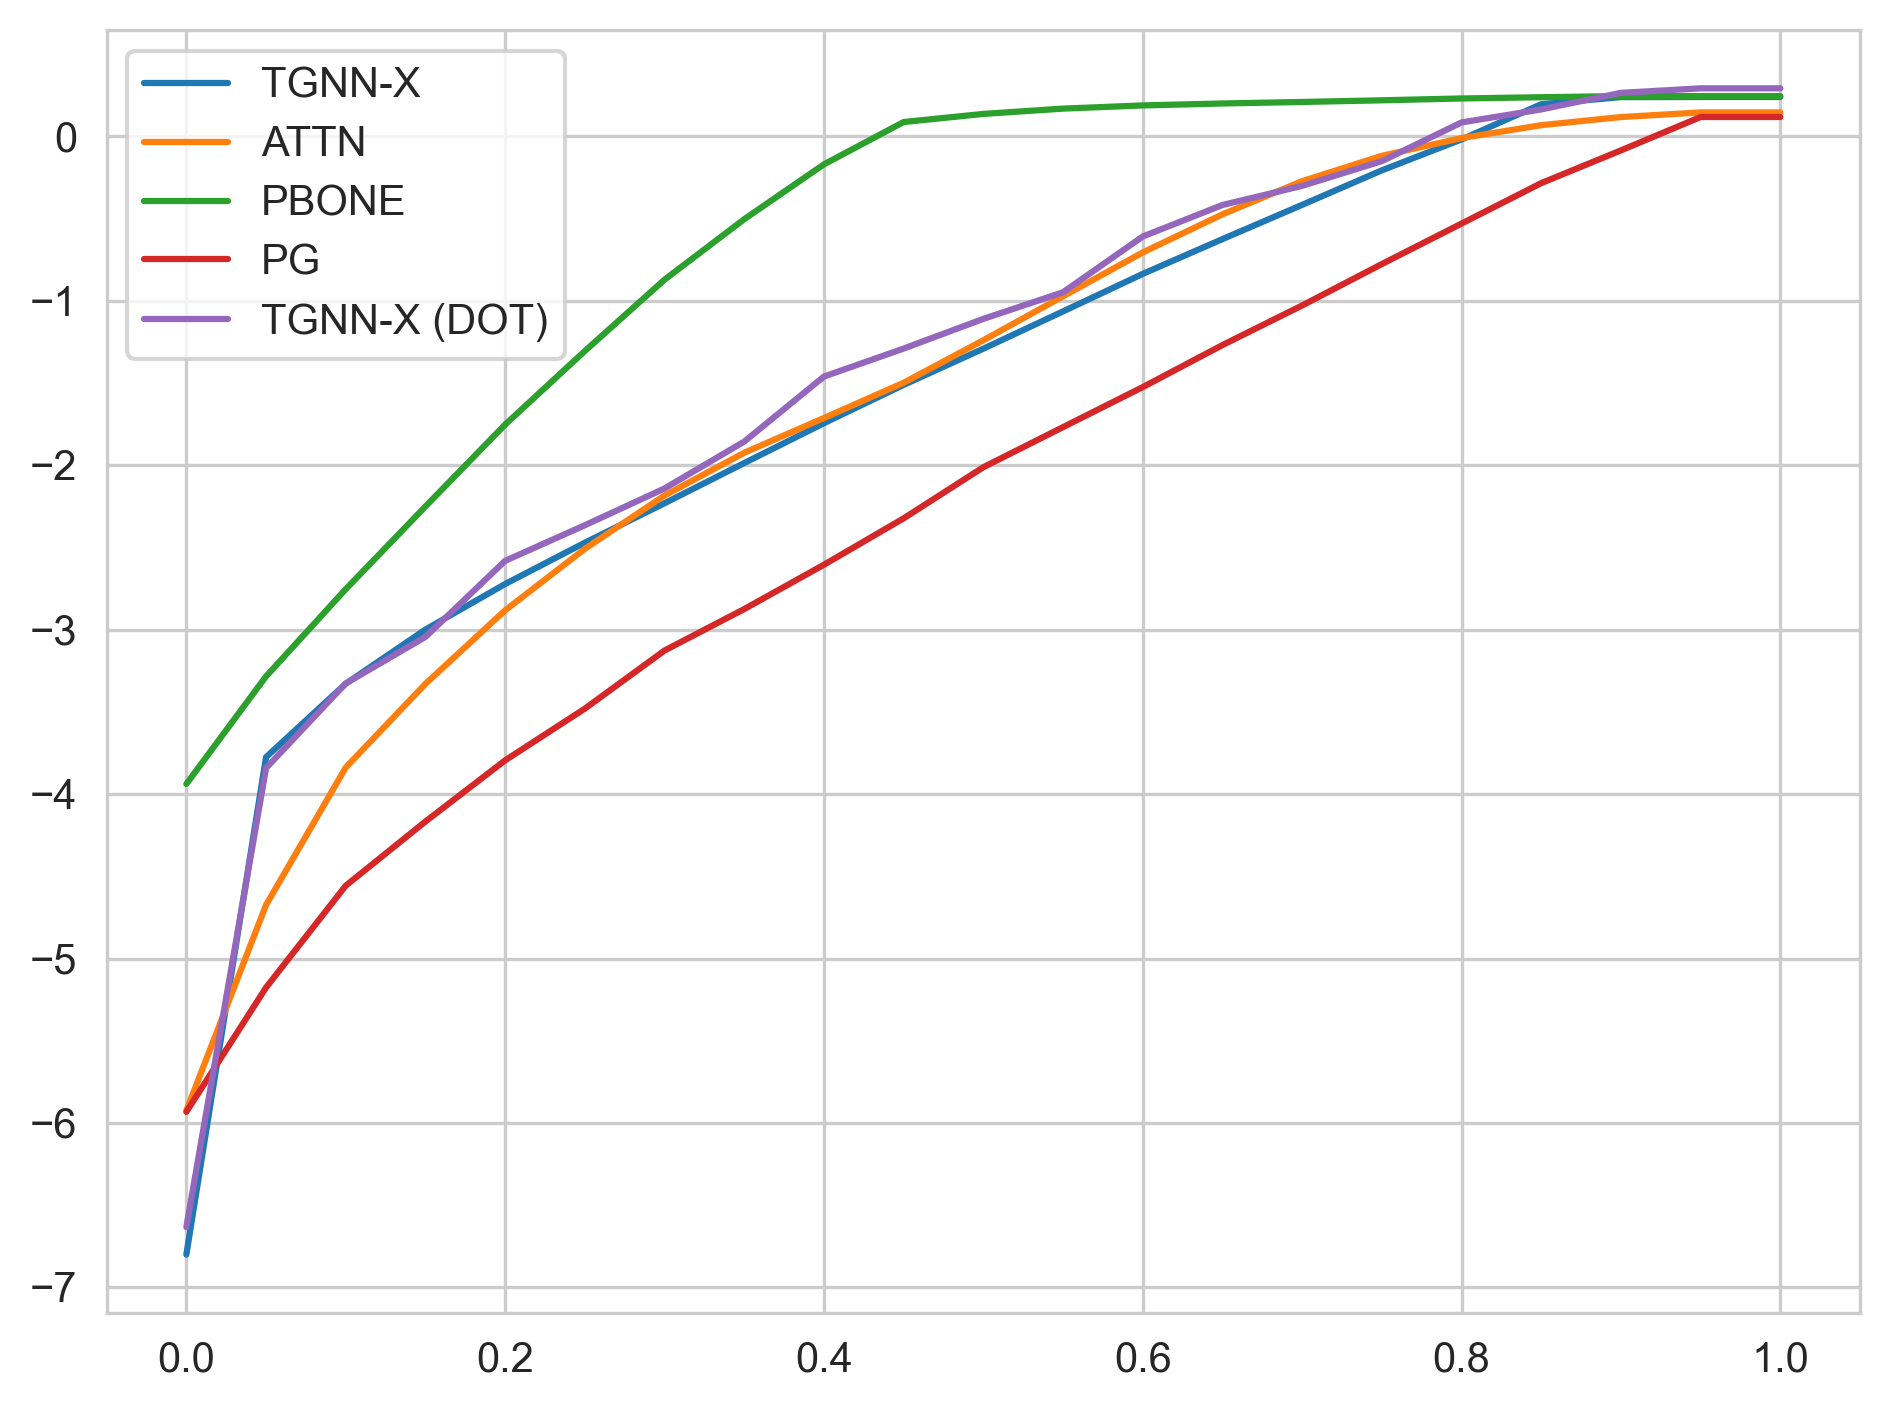

In [80]:
tgn_reddit_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_reddit_subgraphx_tg_470920_to_665351_eval_pg_true_pg_positive.csv",
            "tgn_reddit_attn_explainer_tg_470920_to_665351_eval.csv",
            "tgn_reddit_pbone_explainer_tg_470920_to_665351_eval.csv",
            "tgn_reddit_pg_explainer_tg_470920_to_665351_eval.csv",
            "tgn_reddit_subgraphx_tg_470920_to_663534_eval_dot_true_pg_positive.csv"
        ],
    )
}

tgn_reddit_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean() for k, v in tgn_reddit_files.items()
}

tgn_reddit_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgn_reddit_tabs.items()
}

tgn_reddit_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index) for k, tab in tgn_reddit_tabs.items()
}

print("Best Fid:", tgn_reddit_best_fids)
print("AUFSC:", tgn_reddit_aufsc)

for k, tab in tgn_reddit_tabs.items():
    print(
        f"{k}\t FID: {tab['fid_inv_best'].max()} \t AUC: {np.trapz(tab['fid_inv_best'], tab.index)}"
    )
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k])
plt.legend();plt.tight_layout()
plt.savefig("plots/tgn_reddit.png")

## Simulate V1

Best Fid: {'xtg': 2.037055053472519, 'attn': 1.502154535293579, 'pbone': 1.814053654909134, 'pg': 1.4355251576900483, 'xtg-d': 1.2187664695814544}
AUFSC: {'xtg': 1.6109038057923317, 'attn': 0.8892634652346372, 'pbone': 0.8859449886798859, 'pg': 0.09209337216615679, 'xtg-d': 0.053247118639011}
xtg	 FID: 2.037055053472519 	 AUC: 1.6109038057923317
attn	 FID: 1.502154535293579 	 AUC: 0.8892634652346372
pbone	 FID: 1.814053654909134 	 AUC: 0.8859449886798859
pg	 FID: 1.4355251576900483 	 AUC: 0.09209337216615679
xtg-d	 FID: 1.2187664695814544 	 AUC: 0.053247118639011


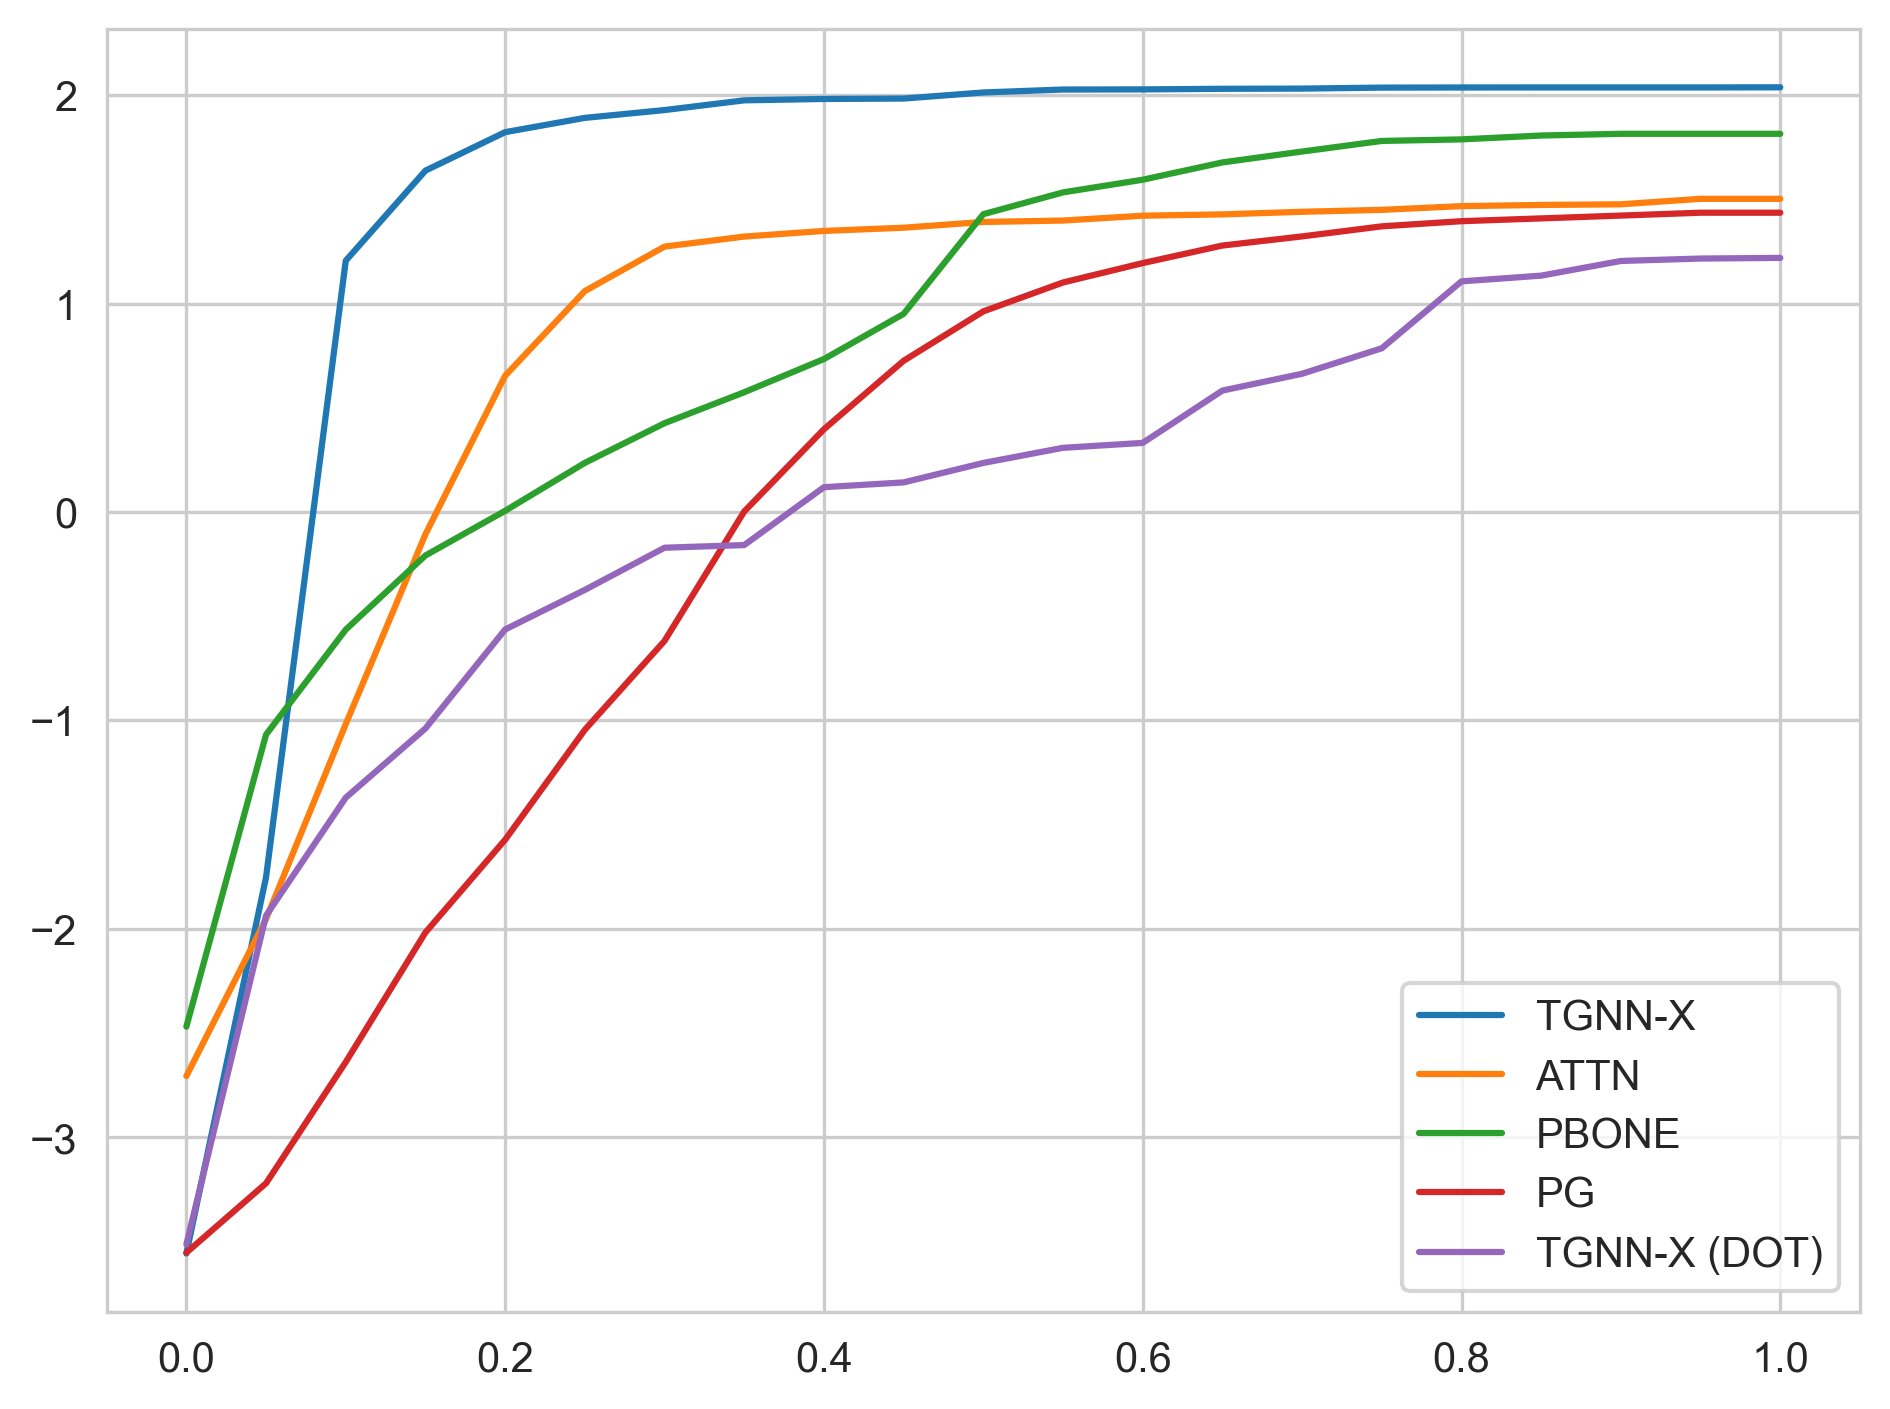

In [82]:
tgn_simulate_v1_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_simulate_v1_subgraphx_tg_3_to_15902_eval_pg_true_pg_positive.csv",
            "tgn_simulate_v1_attn_explainer_tg_3_to_15902_eval.csv",
            "tgn_simulate_v1_pbone_explainer_tg_3_to_15902_eval.csv",
            "tgn_simulate_v1_pg_explainer_tg_3_to_15902_eval.csv",
            "tgn_simulate_v1_subgraphx_tg_3_to_15902_eval_dot_true_pg_positive.csv"
        ],
    )
}

tgn_simulate_v1_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgn_simulate_v1_files.items()
}

tgn_simulate_v1_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgn_simulate_v1_tabs.items()
}

tgn_simulate_v1_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgn_simulate_v1_tabs.items()
}
print("Best Fid:", tgn_simulate_v1_best_fids)
print("AUFSC:", tgn_simulate_v1_aufsc)

for k, tab in tgn_simulate_v1_tabs.items():
    print(
        f"{k}\t FID: {tab['fid_inv_best'].max()} \t AUC: {np.trapz(tab['fid_inv_best'], tab.index)}"
    )
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k])
plt.legend();plt.tight_layout()
plt.savefig("plots/tgn_simulate_v1.png")

## Simulate V2

Best Fid: {'xtg': 2.4425940346121786, 'attn': 1.659767407119274, 'pbone': 2.81320695155859, 'pg': 1.1117126109600066, 'xtg-d': 2.975381005920616}
AUFSC: {'xtg': 0.8982748537071047, 'attn': -0.6773320452421904, 'pbone': -0.29036131019219763, 'pg': -1.903435571766645, 'xtg-d': 0.40429096622940386}
xtg	 FID: 2.4425940346121786 	 AUC: 0.8982748537071047
attn	 FID: 1.659767407119274 	 AUC: -0.6773320452421904
pbone	 FID: 2.81320695155859 	 AUC: -0.29036131019219763
pg	 FID: 1.1117126109600066 	 AUC: -1.903435571766645
xtg-d	 FID: 2.975381005920616 	 AUC: 0.40429096622940386


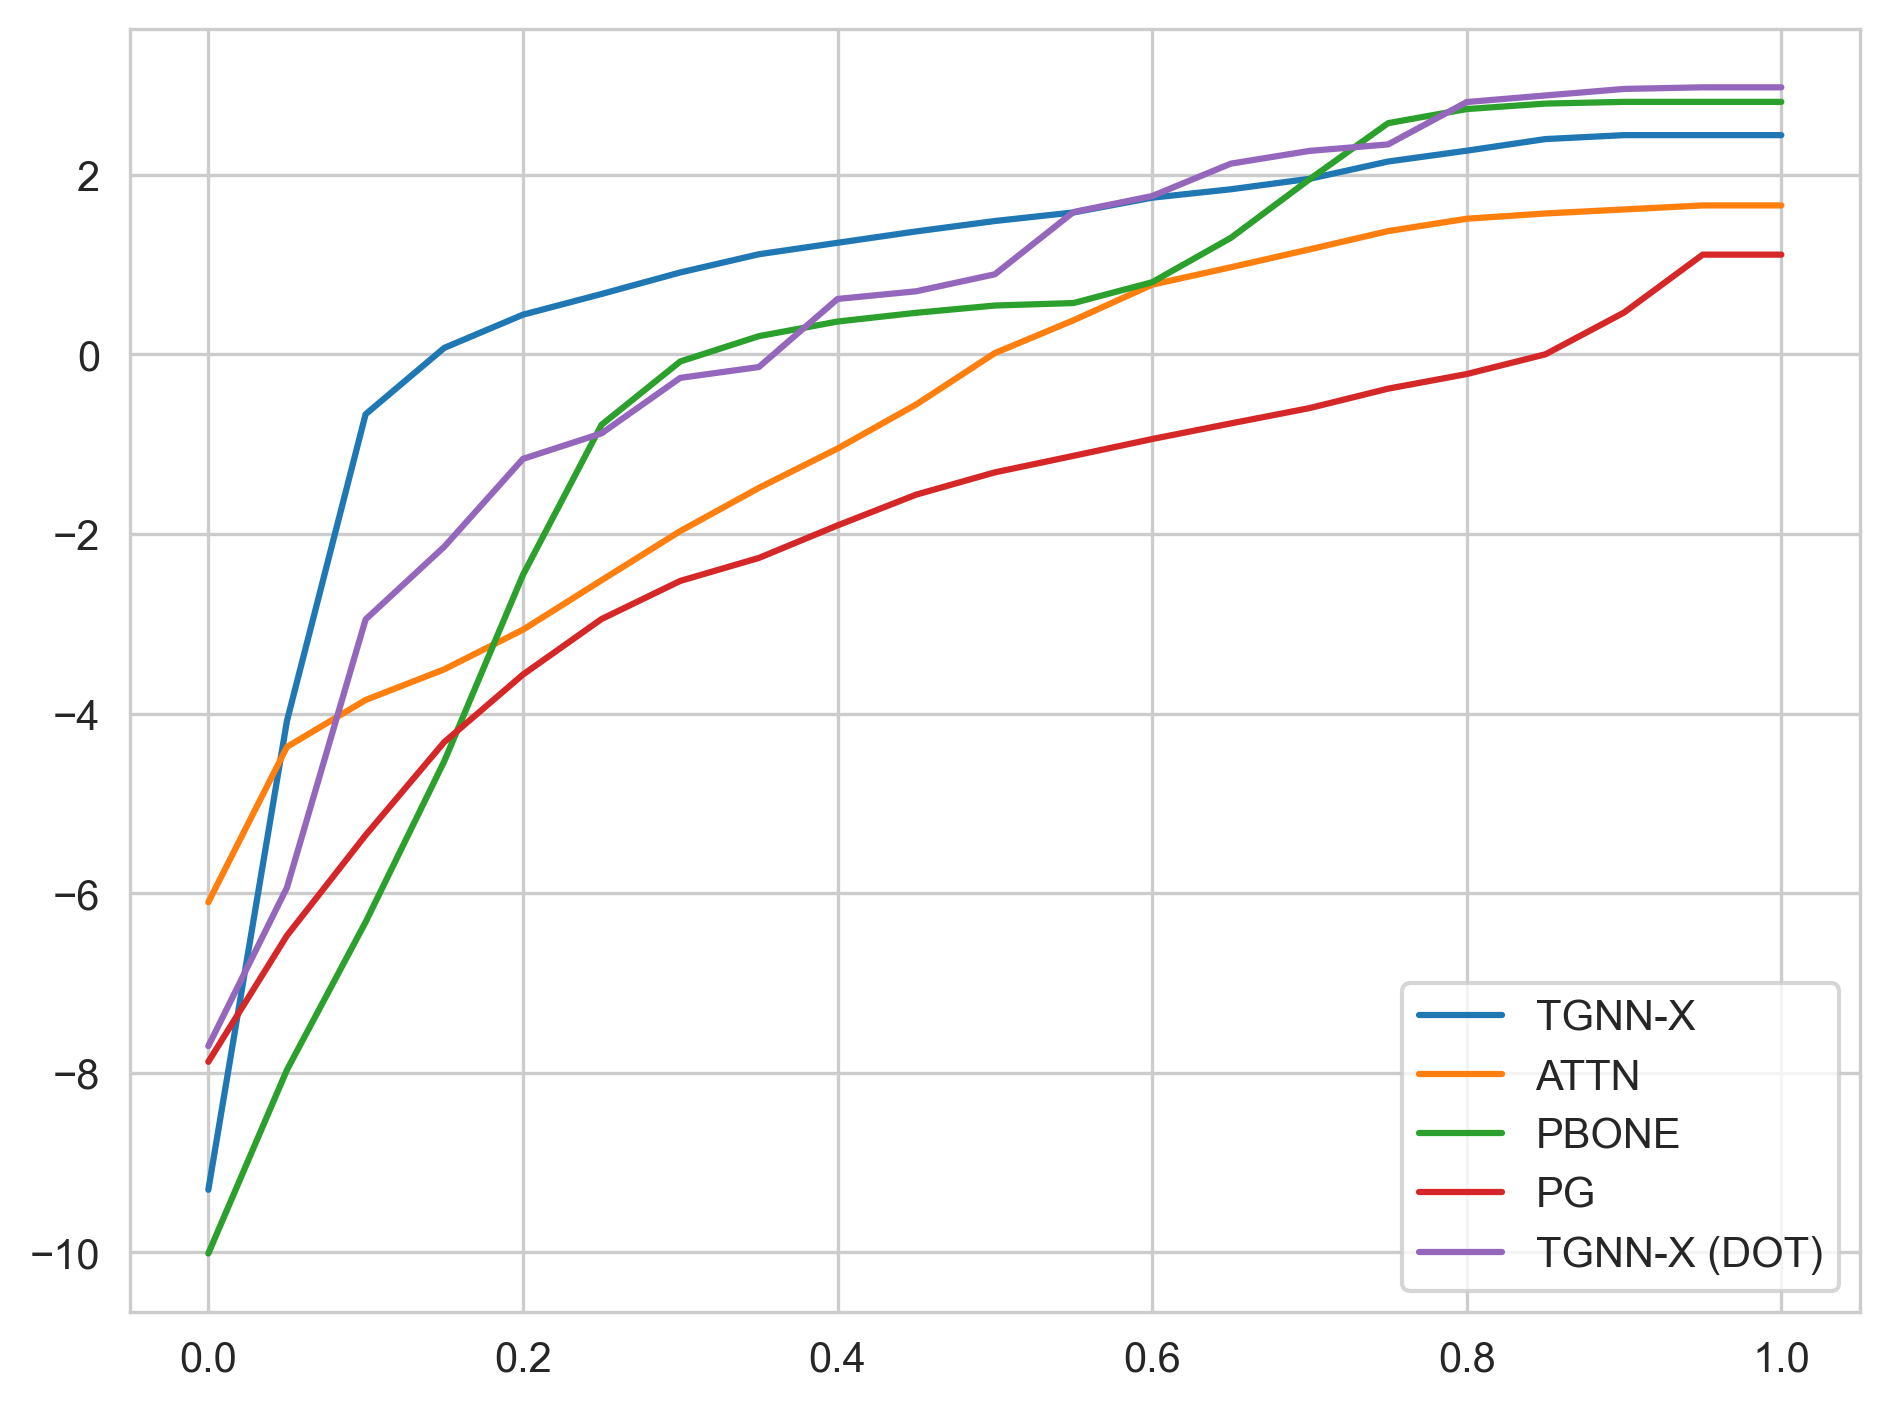

In [83]:
tgn_simulate_v2_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_simulate_v2_subgraphx_tg_3_to_21752_eval_pg_true_pg_positive.csv",
            "tgn_simulate_v2_attn_explainer_tg_3_to_21752_eval.csv",
            "tgn_simulate_v2_pbone_explainer_tg_3_to_21752_eval.csv",
            "tgn_simulate_v2_pg_explainer_tg_3_to_21752_eval.csv",
            "tgn_simulate_v2_subgraphx_tg_3_to_21752_eval_dot_true_pg_positive.csv"
        ],
    )
}
tgn_simulate_v2_tabs = {
    k: pd.read_csv(v).groupby("sparsity").mean()
    for k, v in tgn_simulate_v2_files.items()
}
tgn_simulate_v2_best_fids = {
    k: tab["fid_inv_best"].max() for k, tab in tgn_simulate_v2_tabs.items()
}
tgn_simulate_v2_aufsc = {
    k: np.trapz(tab["fid_inv_best"], tab.index)
    for k, tab in tgn_simulate_v2_tabs.items()
}
print("Best Fid:", tgn_simulate_v2_best_fids)
print("AUFSC:", tgn_simulate_v2_aufsc)

for k, tab in tgn_simulate_v2_tabs.items():
    print(
        f"{k}\t FID: {tab['fid_inv_best'].max()} \t AUC: {np.trapz(tab['fid_inv_best'], tab.index)}"
    )
    plt.plot(tab.index, tab["fid_inv_best"], label=labels[k])
plt.legend();plt.tight_layout()
plt.savefig("plots/tgn_simulate_v2.png")

# Assemble everything
Here we assemble everything into a single dataframe and save it to a csv file.

In [86]:
datasets = ("wikipedia", "reddit", "simulate_v1", "simulate_v2")

model = "tgat"
locs = locals()
d1 = {
    f"{model}_{dataset}_best_fids": locs[f"{model}_{dataset}_best_fids"]
    for dataset in datasets
}
d2 = {
    f"{model}_{dataset}_aufsc": locs[f"{model}_{dataset}_aufsc"] for dataset in datasets
}

# zip the two in order to be side by side, my brain is fried i got no better suggestion
d = {}
for (k, v), (k2, v2) in zip(d1.items(), d2.items()):
    d[k] = v
    d[k2] = v2

df_tgat = pd.DataFrame.from_dict(d, orient="columns")

index = pd.MultiIndex(
    levels=[
        ["Wikipedia", "Reddit", "Simulate V1", "Simulate V2"],
        ["Best FID", "AUFSC"],
    ],
    codes=[
        [0, 0, 1, 1, 2, 2, 3, 3],
        [0, 1, 0, 1, 0, 1, 0, 1],
    ],
    names=["", ""],
)

df_tgat.columns = index
df_tgat.index = labels.values()
df_tgat = df_tgat.T[
    ["ATTN", "PBONE", "PG", "TGNN-X", "TGNN-X (DOT)"]
].T  # reorder rows to correspond to their order

df_diff = (df_tgat - df_tgat_theirs) / df_tgat_theirs


datasets = ("wikipedia", "reddit", "simulate_v1", "simulate_v2")

# model = "tgat"
model = "tgn"

locs = locals()
d1 = {
    f"{model}_{dataset}_best_fids": locs[f"{model}_{dataset}_best_fids"]
    for dataset in datasets
}
d2 = {
    f"{model}_{dataset}_aufsc": locs[f"{model}_{dataset}_aufsc"] for dataset in datasets
}

# zip the two in order to be side by side, my brain is fried i got no better suggestion
d = {}
for (k, v), (k2, v2) in zip(d1.items(), d2.items()):
    d[k] = v
    d[k2] = v2

df_tgat = pd.DataFrame.from_dict(d, orient="columns")

index = pd.MultiIndex(
    levels=[
        ["Wikipedia", "Reddit", "Simulate V1", "Simulate V2"],
        ["Best FID", "AUFSC"],
    ],
    codes=[
        [0, 0, 1, 1, 2, 2, 3, 3],
        [0, 1, 0, 1, 0, 1, 0, 1],
    ],
    names=["", ""],
)

df_tgat.columns = index
df_tgat.index = labels.values()
df_tgat = df_tgat.T[
    ["ATTN", "PBONE", "PG", "TGNN-X", "TGNN-X (DOT)"]
].T  # reorder rows to correspond to their order in OG paper

import matplotlib.colors as mcolors
def color_gradient(val, cmap="coolwarm", vmin=None, vmax=None):
    """
    Takes a scalar and returns a string with
    the css property `'color: ...'` for a color
    based on the value relative to the vmin and vmax.
    """
    cmap = plt.get_cmap(cmap)
    norm = mcolors.AsinhNorm(vmin=vmin, vmax=vmax)
    color = mcolors.rgb2hex(cmap(norm(val)))
    return f" color: {color}({val})"


# df_latex = df_tgat.applymap(lambda x: f"{x:.2f}") + (df_tgat - df_tgat_theirs).applymap(lambda x: f" ({x:.1f})")
# display(df_latex)

df_latex = df_tgat
df_latex = (
    df_latex.style
    .highlight_max(props='font-weight:bold')
    .apply(lambda x: np.where(x == x.nlargest(2)[-1], 'font-style:oblique;', None))
    .format(precision=3)
    .to_latex(
    convert_css=True,
    multicol_align="c",
    hrules=True,
    column_format="lrrrrrrrr",
).replace('\\slshape', '\\underline').replace(
    "\\end{tabular}",
    f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_results}}$\\dagger$ Explainer results for {model.upper()} model.}}",
))

df_diff = (df_tgat - locs[f"df_{model}_theirs"]) / locs[f"df_{model}_theirs"] * 100
df_diff = (
    df_diff.style.format(precision=3)
    .to_latex(
        convert_css=True,
        multicol_align="c",
        hrules=True,
        position_float="centering",
        column_format="lrrrrrrrr",
    )
    .replace(
        "\\end{tabular}",
        f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_results_diff}}Relative difference in results for {model.upper()} model with respect to the original paper (in \\%).}}",
    )
)
with open(f"{model}_results_tab.tex", "w") as f:
    f.write(df_latex)

with open(f"{model}_results_diff_tab.tex", "w") as f:
    f.write(df_diff)

with open(f"{model}_results_og_tab.tex", "w") as f:
    f.write(
        locs[f"df_{model}_theirs"].style.format(precision=3).to_latex(
            multicol_align="c",
            hrules=True,
            clines="skip-last;data",
            position_float="centering",
            column_format="lcccccccc",
        ).replace(
            "\\end{tabular}",
            f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_results_og}}Results for {model.upper()} model from the original paper.}}"))

# set display precision
print(df_latex)

\begin{tabular}{lrrrrrrrr}
\toprule
 & \multicolumn{2}{c}{Wikipedia} & \multicolumn{2}{c}{Reddit} & \multicolumn{2}{c}{Simulate V1} & \multicolumn{2}{c}{Simulate V2} \\
 & Best FID & AUFSC & Best FID & AUFSC & Best FID & AUFSC & Best FID & AUFSC \\
\midrule
ATTN & 0.515 & 0.313 & 0.145 & -1.546 & 1.502 & \underline 0.889 & 1.660 & -0.677 \\
PBONE & 0.648 & \underline 0.393 & \underline 0.244 & \bfseries -0.629 & \underline 1.814 & 0.886 & \underline 2.813 & -0.290 \\
PG & 0.460 & -0.367 & 0.117 & -2.209 & 1.436 & 0.092 & 1.112 & -1.903 \\
TGNN-X & \underline 0.829 & \bfseries 0.444 & 0.239 & -1.492 & \bfseries 2.037 & \bfseries 1.611 & 2.443 & \bfseries 0.898 \\
TGNN-X (DOT) & \bfseries 0.943 & 0.317 & \bfseries 0.291 & \underline -1.391 & 1.219 & 0.053 & \bfseries 2.975 & \underline 0.404 \\
\bottomrule
\end{tabular}
\caption{\label{tab:tgn_results}$\dagger$ Explainer results for TGN model.}



# Decision Explanation

In [37]:
mcts_node_info = sorted(mcts_path.glob("*simulate_v1_73*"))[-1]
node_info = torch.load(mcts_node_info)
node_info = node_info["saved_MCTSInfo_list"]  # there is only one key in the dict
node_info[0], node_info[-1]

({'coalition': [7360, 7364, 7378],
  'created_by_remove': 7369,
  'c_puct': 5,
  'W': -1.0152339935302734,
  'N': 6,
  'P': -12.418044090270996,
  'Sparsity': 0.12},
 {'coalition': [7357,
   7358,
   7359,
   7360,
   7361,
   7363,
   7367,
   7368,
   7369,
   7371,
   7372,
   7373,
   7378],
  'created_by_remove': 7355,
  'c_puct': 5,
  'W': -0.1692056655883789,
  'N': 1,
  'P': 0.7340898513793945,
  'Sparsity': 0.52})

# Runtime comparison

In [217]:
# seconds
training_runtimes = {
    # simulate_v1, simulate_v2, wikipedia, reddit
    "TGAT": [5.0, 6.1, 93, 627.23],
    "TGN": [18.1, 4.2, 84.7, 614],
}


candidate_scores_path = results_path / "candidate_scores"
globs = {
    # XTG, ATTN, PBONE, PG, XTG-D
    k: v
    for k, v in zip(
        ["xtg", "xtg-non", "xtg-d"],
        [
            "{model}_{dataset}*pg_true*",
            "{model}_{dataset}*pg_false*",
            # '{model}_{dataset}*_attn*',
            # '{model}_{dataset}*_pbone*',
            # '{model}_{dataset}*_pg*',
            "{model}_{dataset}*dot_true*",
        ],
    )
}

# TGNN-X

# model = "tgat"
model = "tgn"
scores = {}
not_found = []
for explainer in globs:
    scores[explainer] = {}
    for dataset in ["simulate_v1", "simulate_v2", "wikipedia", "reddit"]:
        try:
            glob = candidate_scores_path.glob(
                globs[explainer].format(model=model, dataset=dataset)
            )

            # collate stats for all runs
            arrs = [pd.read_csv(g) for g in glob]
            res = []
            for arr in arrs:
                # find the best score
                boop = arr["best_reward"]
                # normalize
                boop = (boop - boop.min()) / (boop.max() - boop.min())
                # find the idx of the first score above 0.8
                idx = (boop >= 0.8).to_numpy().argmax()
                res.append(arr["runtime"].to_numpy()[idx])

            sc = np.array(res)

            # filter outliers
            # sc = sc[sc - sc.mean() < 3 * sc.std()]
            print(len(sc))
            scores[explainer][dataset] = (sc.mean(), sc.std())
        except (KeyError, StopIteration):
            not_found.append(f"{explainer}_{dataset}")
            continue
print("Not found:", not_found)

# deepcopy to avoid overwriting
explainer_fid_times = pd.DataFrame.from_dict(scores, orient="columns").T
explainer_fid_times = explainer_fid_times.rename(labels, inplace=False).rename(
    dataset_to_index, axis=1, inplace=False
)

explainer_fid_times = explainer_fid_times.applymap(lambda x: f"{x[0]:.2f} ± {x[1]:.1f}")
explainer_fid_latex = explainer_fid_times.style.to_latex(hrules=True).replace(
        "\\end{tabular}",
        f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_time}}TGNN-X time to 80\% of best fidelity for {model.upper()} model.}}\n",
    )

with open(f"{model}_time_tab.tex", "w") as f:
    f.write(explainer_fid_latex)
print(explainer_fid_latex)


500
500
499
499
102
102
100
0


/var/folders/jh/2h78bdyj1qzfbls2j1yfbv9c0000gn/T/ipykernel_61960/238335771.py:57: RuntimeWarning: Mean of empty slice.
  scores[explainer][dataset] = (sc.mean(), sc.std())
/Users/Matey/miniconda3/envs/mlkit/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Users/Matey/miniconda3/envs/mlkit/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Matey/miniconda3/envs/mlkit/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/Matey/miniconda3/envs/mlkit/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


108
102
100
100
Not found: []
\begin{tabular}{lllll}
\toprule
 & Synthetic V1 & Synthetic V2 & Wikipedia & Reddit \\
\midrule
TGNN-X & 4.02 ± 6.4 & 9.75 ± 9.5 & 13.36 ± 15.7 & 36.34 ± 35.7 \\
TGNN-X (NO NAV) & 10.84 ± 9.4 & 8.62 ± 7.9 & 22.82 ± 25.1 & nan ± nan \\
TGNN-X (DOT) & 14.07 ± 12.0 & 5.87 ± 5.9 & 24.43 ± 28.7 & 32.44 ± 31.1 \\
\bottomrule
\end{tabular}
\caption{\label{tab:tgn_time}TGNN-X time to 80\% of best fidelity for TGN model.}




In [196]:
tgat_table = tgnnx_pg_scores.applymap(lambda x: f"{x[0]:.2f} ± {x[1]:.1f}")
print(tgat_table.style.to_latex(hrules=True
).replace('\\end{tabular}', f'\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_time}}TGNN-X time to 80\% of best fidelity for {model.upper()} model.}}\n'))

\begin{tabular}{lllll}
\toprule
 & Synthetic V1 & Synthetic V2 & Wikipedia & Reddit \\
\midrule
TGNN-X & 4.50 ± 5.3 & 3.94 ± 7.9 & 9.23 ± 11.1 & 48.66 ± 49.6 \\
TGNN-X (NO NAV) & 9.95 ± 11.3 & 4.96 ± 10.4 & 12.40 ± 13.9 & 53.27 ± 37.1 \\
TGNN-X (DOT) & 19.00 ± 18.3 & 7.96 ± 12.5 & 14.63 ± 15.6 & 46.72 ± 45.7 \\
\bottomrule
\end{tabular}
\caption{\label{tab:tgat_time}TGNN-X time to 80\% of best fidelity for TGAT model.}


